<a href="https://colab.research.google.com/github/renardelyon/Deep-Learning-with-Python-Exercise/blob/main/Cat_dogs_classification_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download cat-dogs datasets
!chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
!kaggle competitions download -c dogs-vs-cats


chmod: cannot access 'kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
import zipfile

with zipfile.ZipFile('/content/test1.zip','r') as zip:
  zip.extractall('/content')

with zipfile.ZipFile('/content/train.zip','r') as zip:
  zip.extractall('/content')

In [9]:
import os
#create train, test, and val dir
base_dir = '/content'
train_dir = os.path.join(base_dir,'Train')
val_dir = os.path.join(base_dir,'Validation')
test_dir = os.path.join(base_dir, 'Test')

dirs = [train_dir,val_dir,test_dir]
for dir in dirs:
  os.mkdir(dir)

In [10]:
animals = ['cats','dogs']
for dir in dirs:
  for animal in animals:
    os.mkdir(os.path.join(dir,animal))
    

In [11]:
ALL_PATH=[]
for dir in dirs:
  for animal in animals:
    PATH = (os.path.join(dir,animal))
    ALL_PATH.append(PATH)

In [12]:
ALL_PATH

['/content/Train/cats',
 '/content/Train/dogs',
 '/content/Validation/cats',
 '/content/Validation/dogs',
 '/content/Test/cats',
 '/content/Test/dogs']

In [13]:
total_fnames = []
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
total_fnames.append(fnames)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
total_fnames.append(fnames)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
total_fnames.append(fnames)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
total_fnames.append(fnames)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
total_fnames.append(fnames)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
total_fnames.append(fnames)

In [14]:
import shutil

for i,fnames in enumerate(total_fnames):
  for fname in fnames:
    src = os.path.join('/content/train',fname)
    dst = os.path.join(ALL_PATH[i],fname)
    shutil.copyfile(src,dst)
    

In [15]:
print('total training cat images:', len(os.listdir(ALL_PATH[0])))
print('total training dog images:', len(os.listdir(ALL_PATH[1])))
print('total validation cat images:', len(os.listdir(ALL_PATH[2])))
print('total validation dog images:', len(os.listdir(ALL_PATH[3])))
print('total test cat images:', len(os.listdir(ALL_PATH[4])))
print('total test dog images:', len(os.listdir(ALL_PATH[5])))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                               input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras import optimizers 
model.compile(loss='binary_crossentropy',
              metrics=['acc'],
              optimizer=optimizers.RMSprop(lr=1e-4))

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=.2,
                                 shear_range=0.2,
                                 zoom_range=.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
val_datagen=ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                                 width_shift_range=.2,
                                 shear_range=0.2,
                                 zoom_range=.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), class_mode = 'binary',
    batch_size=20
)

val_generator = val_datagen.flow_from_directory(
    train_dir, target_size=(150,150), class_mode = 'binary',
    batch_size=20
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=30)

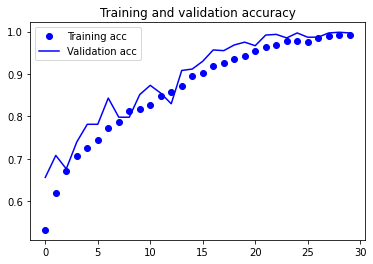

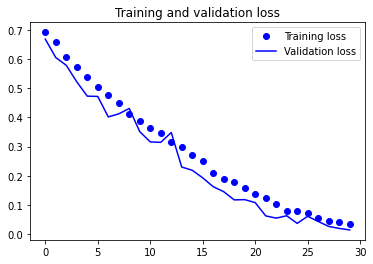

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###ConvNet with Pretrained Model

In [4]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(include_top=False,
                  input_shape=(150,150,3))
conv_base.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [23]:
import tensorflow as tf

model = tf.keras.Sequential([
        conv_base,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [28]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 78s 8s/step - loss: 0.5792 - acc: 0.7200 - val_loss: 0.5729 - val_acc: 0.7200
Epoch 2/30
10/10 [==============================] - 78s 8s/step - loss: 0.5661 - acc: 0.7450 - val_loss: 0.5678 - val_acc: 0.7350
Epoch 3/30
10/10 [==============================] - 78s 8s/step - loss: 0.5452 - acc: 0.7550 - val_loss: 0.5290 - val_acc: 0.7800
Epoch 4/30
10/10 [==============================] - 78s 8s/step - loss: 0.4979 - acc: 0.7900 - val_loss: 0.5203 - val_acc: 0.7750
Epoch 5/30
10/10 [==============================] - 78s 8s/step - loss: 0.5363 - acc: 0.7500 - val_loss: 0.4836 - val_acc: 0.7950
Epoch 6/30
10/10 [==============================] - 78s 8s/step - loss: 0.4913 - acc: 0.8000 - val_loss: 0.5022 - val_acc: 0.7850
Epoch 7/30
10/10 [==============================] - 78s 8s/step - loss: 0.4749 - acc: 0.7750 - val_loss: 0.4784 - val_acc: 0.8200
Epoch 8/30
10/10 [==============================] - 78s 8s/step - loss: 0.4392 - acc: 0.79

In [4]:
from tensorflow.keras.applications import VGG16

model = VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [6]:
import requests
response = requests.get\
('https://seattleglobalist.com/wp-content/uploads/2016/07/female-elephant-341983_1280.jpg')

file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16 as vg

img_path = '/content/sample_image.png'

img = image.load_img(img_path,target_size=(224,224))

x = image.img_to_array(img)

x = np.expand_dims(x,axis=0)

x = vg.preprocess_input(x)

In [12]:
preds = model.predict(x)
print(vg.decode_predictions(preds,3))

40960/35363 [==================================] - 0s 0us/step
[[('n02504458', 'African_elephant', 0.90942115), ('n01871265', 'tusker', 0.08618273), ('n02504013', 'Indian_elephant', 0.0043545915)]]


In [13]:
np.argmax(preds[0])

386

In [31]:
import tensorflow.keras.backend as K

african_elephant_output = model.output[:,386]
last_layer = model.get_layer('block5_conv3').output[:,:,:,:]

In [37]:
#grads = K.gradients(african_elephant_output,last_layer.output)[0]

with tf.GradientTape() as gtype:
  grads = gtype.gradient(last_layer,african_elephant_output)

AttributeError: ignored

In [34]:
last_layer

<KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'tf.__operators__.getitem_6')>